In [7]:
import matplotlib.pyplot as plt
import numpy as np
import random

### 1.1 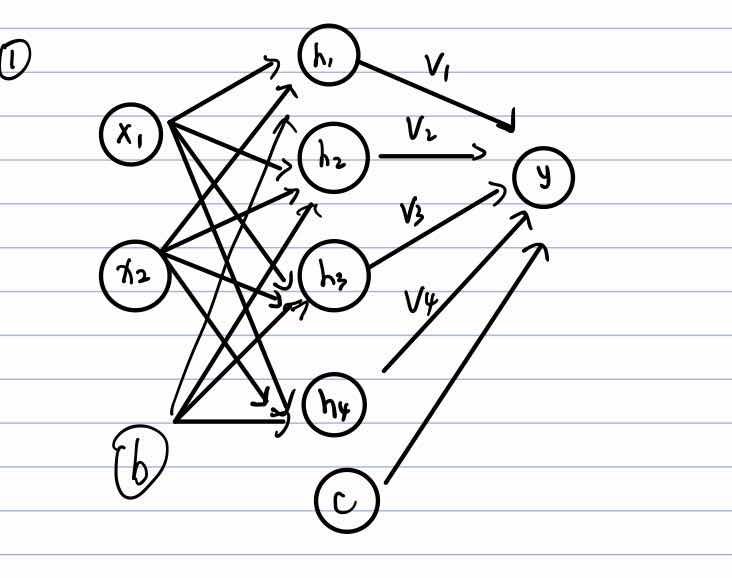

### 1.2
y = $\sigma(v_{1}f(W_{11}X_{1}+W_{12}X_{2}+b_{1}) + v_{2}f(W_{21}X_{1}+W_{22}X_{2}+b_{2})$ + $v_{3}f(W_{31}X_{1}+W_{32}X_{2}+b_{3}) + v_{4}f(W_{41}X_{1}+W_{42}X_{2}+b_{4})$ + c

### 1.3

In [8]:
def relu(z):
  return np.where(z>0, z, 0)

def ff_nn_ReLu(X, W, b, relu):
  return relu(np.dot(X, W) + b)

def sigmoid(z):
  '''
  sigmoid activation function
  '''
  return 1 / (1 + np.exp(-np.array(z)))

### 1.4

In [9]:
W = [[1, -1, 0, 1], [0, 0, .5, 1]]
b = np.array([0,0,1,0]).transpose()
V = [1,0,-1,1]
c = [1]
X = [[1, -1], [0, -1], [0,1]]

In [10]:
y_hat = sigmoid(np.dot(ff_nn_ReLu(X, W, b, relu), V) + c)
y_hat

array([0.81757448, 0.62245933, 0.62245933])

### 2.1
f(x, y) = $(3-x)^2+50(2y^2-x)^2$  
$\frac{df}{dx} = -3x^2+100x-200y^2$  
$\frac{df}{dy} = 400y(2y^2-x)$ 

### 2.2

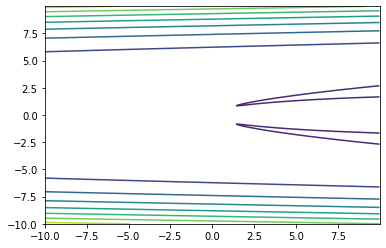

In [11]:
delta = 0.025
x = np.arange(-10.0, 10.0, delta)
y = np.arange(-10.0, 10.0, delta)
X, Y = np.meshgrid(x, y)
Z = (3-X**3)+50*((2*(Y**2)-X)**2)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

### 2.3

In [12]:
def grad_f(vector):
  x, y = vector
  df_dx = -3*x**2+100*x-200*(y**2)
  df_dy = 400*y*(2*(y**2)-x)
  return np.array([df_dx, df_dy])

In [13]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    # your code here
    # be sure to store and return the entire trajectory -- i.e. the results at
    # each step -- as a list or array 
    if starting_point is None:
      point = np.random.uniform(-1, 1, size = 2)
    else:
      point = starting_point
    trajectory = [point]

    for i in range(iterations):
      grad = grad_f(point)
      point = point - learning_rate * grad
      trajectory.append(point)

    return np.array(trajectory)

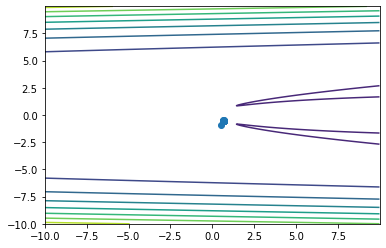

In [14]:
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

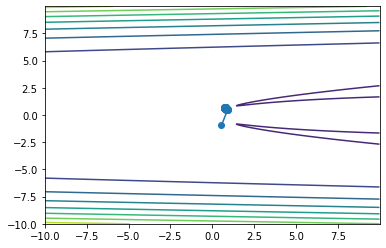

In [15]:
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=0.003)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

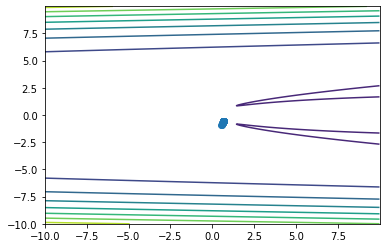

In [16]:
np.random.seed(10)
traj = grad_descent(iterations=50, learning_rate=0.0001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### 2.4

In [17]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
  if starting_point is not None:
    point = starting_point
  else:
    point = np.random.uniform(-1, 1, size=2)

  trajectory = [point]
  v = np.zeros(point.size)

  for i in range(iterations):
    grad = grad_f(point)
    v = alpha * v + epsilon * grad
    point = point - v
    trajectory.append(point)
  
  return np.array(trajectory)

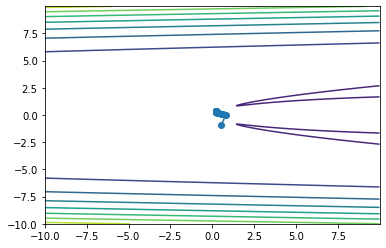

In [18]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, alpha=.009, epsilon=0.002)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

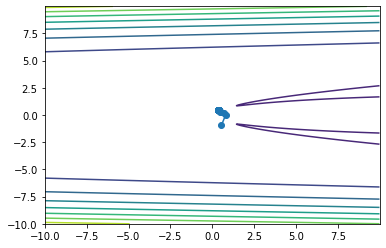

In [19]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, alpha=.09, epsilon=0.002)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

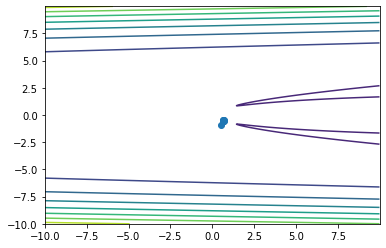

In [20]:
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, alpha=.09, epsilon=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

### 3.1

    # forward pass
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    # backward pass
    dL_dc = binary_xent_residual(y, y_hat).dot( y_hat*(1-y_hat))
    
    dL_dv = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(h)
    
    dL_db = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(relu_derivative(a))*v
  
    dL_dw = x.T.dot(np.expand_dims((binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))

### 3.2

In [21]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2, b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11,w_12, w_13, w_14],[w_21,w_22, w_23, w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    return((W, b, v, c))

In [22]:
W = [[1, -1, 0, 1], [0, 0, .5, 1]]
b = np.array([0,0,1,0])
v = [1,0,-1,1]
c = [1]

In [23]:
def grad_f(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec)
    
    # forward pass
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    # backward pass
    dL_dc = binary_xent_residual(y, y_hat).dot( y_hat*(1-y_hat))
    
    dL_dv = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(h)
    
    dL_db = (binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)).T.dot(relu_derivative(a))*v
  
    dL_dw = x.T.dot(np.expand_dims((binary_xent_residual(y, y_hat) * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
             
    
    return np.array([dL_dw[0,0], dL_dw[0,1], dL_dw[0,2], dL_dw[0,3], dL_dw[1,0], dL_dw[1,1], dL_dw[1,2], dL_dw[1,3], dL_db[0], dL_db[1], dL_db[2], dL_db[3], dL_dv[0], dL_dv[1], dL_dv[2], dL_dv[3], dL_dc]) / len(y) 

### 3.3

In [24]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1

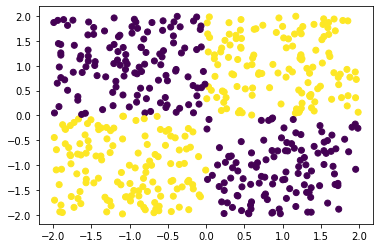

In [25]:
plt.scatter(x[:,0],x[:,1],c=y)

### 3.4

In [26]:
 start = np.array([W[0][0],W[0][1], W[0][2], W[0][3], W[1][0], W[1][1], W[1][2], W[1][3], b[0], b[1], b[2], b[3], v[0], v[1], v[2], v[3], c[0]])

In [27]:
def grad_descent(x, y, iterations=10, learning_rate=1e-2):
    point = start
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)

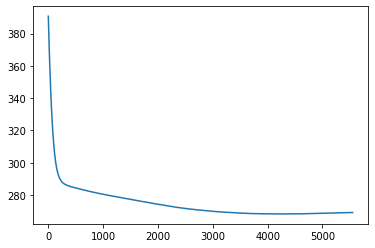

In [28]:
traj, losses = grad_descent(x, y, iterations=5550,learning_rate=1e-2)
plt.plot(losses)

In [29]:
sum(y == np.where(yhat(x,*pack_params(traj[-1])) > .5, 1, 0))

404

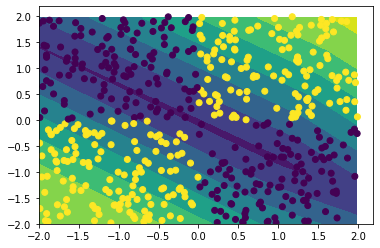

In [30]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)

### 3.5

In [31]:
def grad_descent_with_momentum(x, y, starting_point=None, iterations=10, alpha=.9, epsilon=10):
  if starting_point is not None:
    point = starting_point
  else:
    point = np.random.uniform(-1, 1, size=17)

  trajectory = [point]
  v = np.zeros(point.size)
  losses = [loss(y, yhat(x, *pack_params(point)))]

  for i in range(iterations):
    grad = grad_f(point, x, y)
    v = alpha * v + epsilon * grad
    point = point + v
    trajectory.append(point)
    losses.append(loss(y, yhat(x, *pack_params(point))))
  
  return (np.array(trajectory), losses)

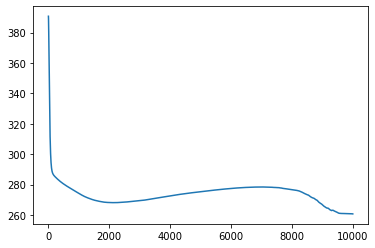

In [32]:
traj, losses = grad_descent_with_momentum(x, y, start, iterations = 10000, alpha =0.9, epsilon=.002)
plt.plot(losses)

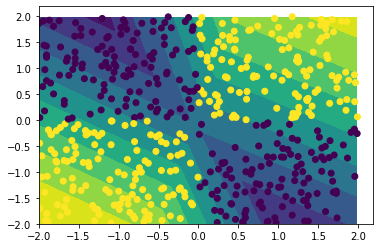

In [33]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)

Looks like gradient desent with momentum coverage more effeciently.

### 3.6

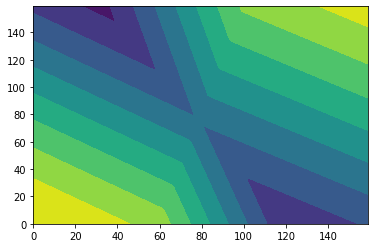

In [34]:
fig, ax = plt.subplots()
CS = ax.contourf(YHAT)